## Observations and Insights 
---
* After review the tables and charts I have many observations and insights about the data we got :

1- Based on the statistics summary table indicate us how does accurate the mean we got it. As first as we know `low standard deviation` is indicate how the data are `cluster to the mean`, on the other hand `low standard error` give us how the `mean accurate represnting the population`. In that situation we found `Capomulin` and `Ramicane` drugs have `Tumor volume more cluster to the mean` than other and `more accurate to represnting the Tumor volume average`.

2-  All the `treatment regimens` have almost the `same number of mice` based on the bar chart. 

3- As we can see in the `box and whisker chart` `Capomulin` and `Ceftamin` have `negative skew` (skewed to the left) based on their `median`  rather than `Ramicane` and `Infubinol` have `normal destrbution`. The `lower` and `upper quartile`  for the `final tumor volume` for each mouse in `Capomulin` and `Ramicane` are `less` than `Infubinol` and `Ceftamin`.

4- As we can see the in the scatter chart `average tumor volume` by using `Capomulin` `tends to increase` as the `weight` variable `increases`, we say there is `a positive correlation` between the variables. `correlation value is 0.84` so it's `stronger linear relationship` because it's close to 1.0.


   

In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df= pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
number_of_mice = combined_df["Mouse ID"].nunique()
number_of_mice

249

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_timepoint_df = study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
mouse_timepoint_df[["Mouse ID","Timepoint"]]


,Mouse ID,Timepoint
107,g989,0
137,g989,0
329,g989,5
360,g989,5
620,g989,10
681,g989,10
815,g989,15
869,g989,15
950,g989,20
1111,g989,20


In [14]:
# Optional: Get all the data for the duplicate mouse ID. 

all_the_dublicate_mouse=pd.merge(mouse_timepoint_df,mouse_metadata,on="Mouse ID")

all_the_dublicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,g989,0,45.000000,0,Propriva,Female,21,26
2,g989,5,48.786801,0,Propriva,Female,21,26
3,g989,5,47.570392,0,Propriva,Female,21,26
4,g989,10,51.745156,0,Propriva,Female,21,26
5,g989,10,49.880528,0,Propriva,Female,21,26
6,g989,15,51.325852,1,Propriva,Female,21,26
7,g989,15,53.442020,0,Propriva,Female,21,26
8,g989,20,55.326122,1,Propriva,Female,21,26
9,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#convert the array to list 
unique_duplicated_mouseids=mouse_timepoint_df["Mouse ID"].unique().tolist()

# find duplicate mouse id index 
filtered = combined_df["Mouse ID"].isin(unique_duplicated_mouseids)
get_index =combined_df[filtered].index

#drop the index has duplicate mouse and reset the index in column 
clean_df=combined_df.drop(get_index).reset_index().drop(["index"],axis=1)
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = clean_df["Mouse ID"].nunique()
clean_number_of_mice

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_group= clean_df.groupby("Drug Regimen")
tumor_mean=regimen_group["Tumor Volume (mm3)"].mean()
tumor_median = regimen_group["Tumor Volume (mm3)"].median()
tumor_variance =regimen_group["Tumor Volume (mm3)"].var()
tumor_sd= regimen_group["Tumor Volume (mm3)"].std()
tumor_sem= regimen_group["Tumor Volume (mm3)"].sem()



In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df= pd.DataFrame({"Tumor volume mean":tumor_mean,
"Tumor volume median":tumor_median,
"Tumor volume variance":tumor_variance,
"Tumor volume STD":tumor_sd,
"Tumor volume SEM":tumor_sem})
summary_statistics_df.head()

# Using the aggregation method, produce the same summary statistics in a single line
sammary_single_line=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Tumor_volume_mean='mean', Tumor_volume_median='median',Tumor_volume_variance='var',Tumor_volume_STD='std',Tumor_volume_SEM='sem')
sammary_single_line.head(12)


,Tumor_volume_mean,Tumor_volume_median,Tumor_volume_variance,Tumor_volume_STD,Tumor_volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

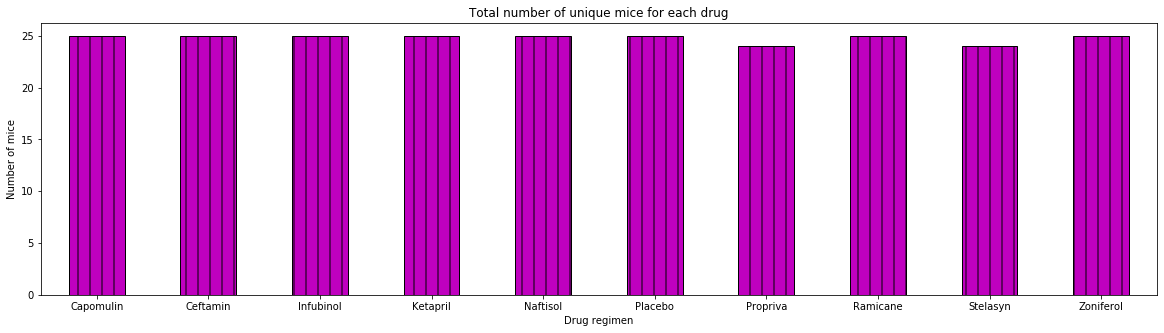

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# I did group by Drug Regimen then create varible to hold each Drug Regimen unique mice number
mouse_id = regimen_group["Mouse ID"].nunique()

#generate the chart using pandas
drug_chart = mouse_id.plot(kind="bar", title="Total number of unique mice for each drug",color="m",edgecolor="k",hatch='|',figsize=(20,5),rot=0)

#put x and y title
drug_chart.set_xlabel("Drug regimen")
drug_chart.set_ylabel("Number of mice")

plt.show()

#to appear the bar full name for the columns 
plt.tight_layout()
mouse_id

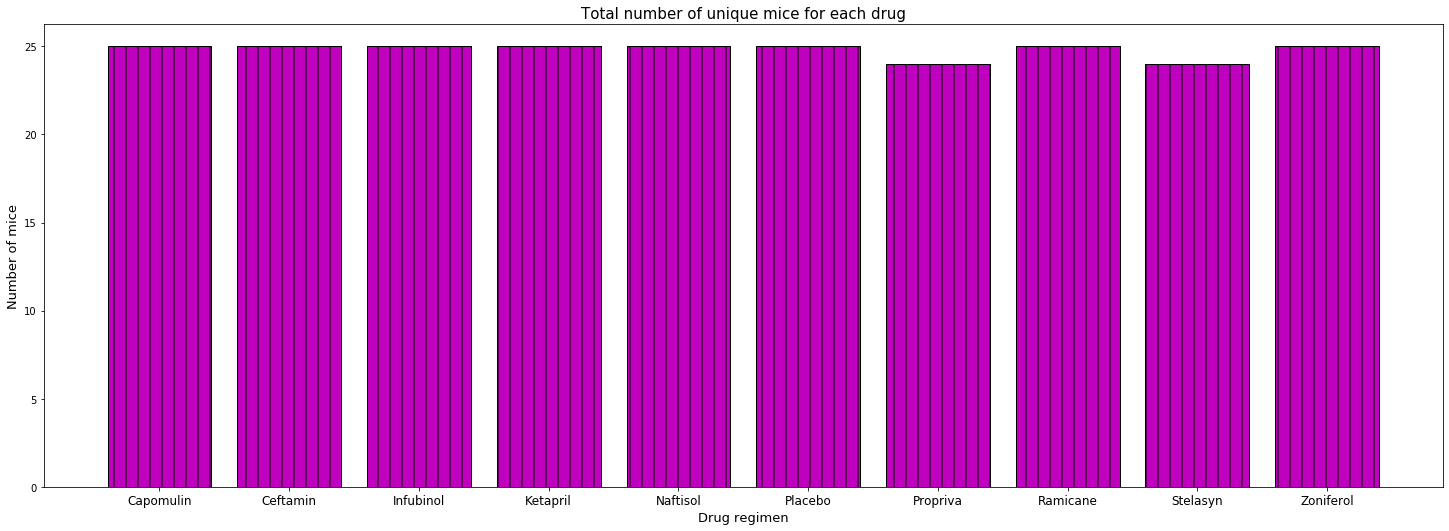

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#brings label name
drug_names=regimen_group["Drug Regimen"].unique()
label = drug_names.keys()

plt.figure(figsize=(20,7))

#length for x_axis
x_axis = np.arange(len(regimen_group))

#convert x_axis array to list 
tick_locations = [value for value in x_axis]

#generate bar chart with x_axis and unique count of each drug regimen 
plt.bar(x_axis,mouse_id, color='m', edgecolor="k",hatch='|')

#generate the label 
plt.xticks(tick_locations,label, rotation="horizontal",fontsize=12)
plt.tight_layout()
plt.title("Total number of unique mice for each drug",fontsize=15)
plt.xlabel("Drug regimen",fontsize=13)
plt.ylabel("Number of mice",fontsize=13)
plt.show()


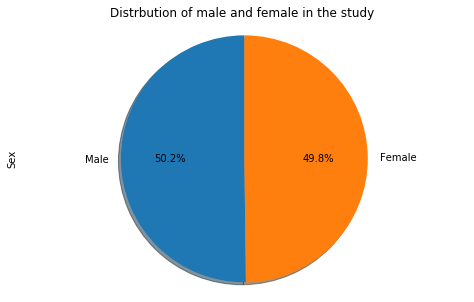

Male      125
Female    124
Name: Sex, dtype: int64

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#count unique number for each gender
sex_of_mice=mouse_metadata["Sex"].value_counts()

#generate the sex-pie 
micesex_pie = sex_of_mice.plot(kind="pie", title=("Distrbution of male and female in the study "),autopct='%1.1f%%',shadow = True, startangle=90,figsize=(8,5))

plt.axis("equal")
plt.show()
sex_of_mice

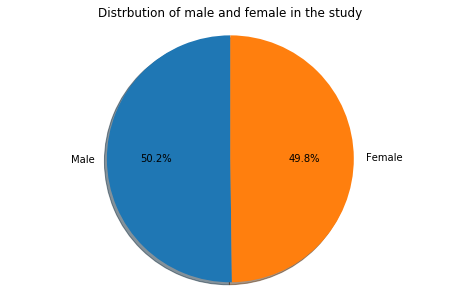

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#brings the label
label = sex_of_mice.keys()

#put the figure size
plt.figure(figsize=(8,5))

#generate the sex-pie 
plt.pie(sex_of_mice,autopct='%1.1f%%',shadow=True,startangle=90,labels=label)
plt.title("Distrbution of male and female in the study")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


filtered_by_drug= clean_df[(clean_df["Drug Regimen"] == 'Capomulin') | (clean_df["Drug Regimen"] == 'Ramicane') |
(clean_df["Drug Regimen"] == 'Infubinol') | (clean_df["Drug Regimen"] == 'Ceftamin')]


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_tumor= filtered_by_drug.groupby('Mouse ID').max()["Timepoint"]
max_timepoint_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_drug_and_max_timepoint= pd.merge(max_timepoint_tumor,filtered_by_drug,on=["Timepoint","Mouse ID"])

merge_drug_and_max_timepoint.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
tretment_list =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#empty list to append lastest volume for each drug
latest_volume_each_drugs=[]

#loop through the tretment list to get the tumor volume for each drug,IQR and outliers
for drug in tretment_list:
    volume_of_tumor=merge_drug_and_max_timepoint[(merge_drug_and_max_timepoint["Drug Regimen"] == drug) ]["Tumor Volume (mm3)"]
    latest_volume_each_drugs.append(volume_of_tumor)

    #the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume_of_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]}")


    #Determine outliers using upper and lower bounds
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}: Values below {lower_bound} could be outliers.")
    print(f"{drug}: Values above {upper_bound} could be outliers.")
    print("----------------------------------------------------------\n")




The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 15.577752179999997
The the median of Capomulin is: 38.125164399999996
Capomulin: Values below 20.70456164999999 could be outliers.
Capomulin: Values above 51.83201549 could be outliers.
----------------------------------------------------------

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 7.781863460000004
The the median of Ramicane is: 36.56165229
Ramicane: Values below 17.912664470000003 could be outliers.
Ramicane: Values above 54.30681135 could be outliers.
----------------------------------------------------------

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 9.098536719999998
The the median of Infubinol is: 60.16518046
Infubinol: Values below 36.83290494999999 could b

<Figure size 1440x720 with 0 Axes>

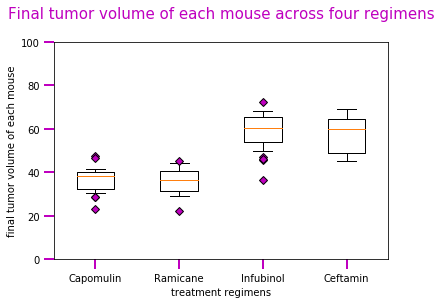

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#style and color the outlier
mov_diamond = dict(markerfacecolor='m', marker='D')

# figure size
fig = plt.figure(figsize=(20,10))

#make sub plots 
fig, ax = plt.subplots()
ax.set_title('Multiple Samples with Different sizes')
#generate boxplot 
ax.boxplot(latest_volume_each_drugs,labels=tretment_list,flierprops=mov_diamond, whis=.5)
plt.ylim(0, 100)

#style tick parameters x and y
plt.tick_params(labelsize=10, width=2, length=10,color="m")
plt.title("Final tumor volume of each mouse across four regimens\n",fontsize=15,color="m")
plt.ylabel("final tumor volume of each mouse")
plt.xlabel("treatment regimens")
plt.show()

## Line and Scatter Plots

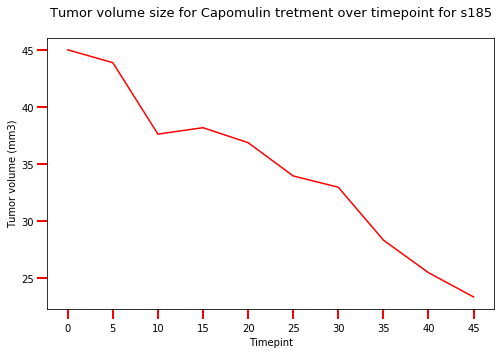

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#look up for just mice treted with Capomulin
mouse_treated_with_Capomulin=clean_df[(clean_df["Drug Regimen"] == "Capomulin")]

#ask the user which mouse you looking for
mouse_id= input("what the mouse id you looking for ? (should be mouse treated by Capomulin")

#bring thar mouse treted with Capomulin
one_mouse_df = mouse_treated_with_Capomulin[mouse_treated_with_Capomulin["Mouse ID"] == mouse_id]

plt.figure(figsize=(8,5))
plt.tick_params(labelsize=10, width=2, length=10,color="r")
plt.xlabel("Timepint")
plt.ylabel("Tumor volume (mm3)")

#arange for x from 0 to 50 increment by 5 
plt.xticks(np.arange(0,50,5))
plt.title(f"Tumor volume size for Capomulin tretment over timepoint for {mouse_id}\n",fontsize=13)

#generate the chart by call x and y 
plt.plot(one_mouse_df["Timepoint"],one_mouse_df["Tumor Volume (mm3)"],color="r")
plt.show()  
mouse_treated_with_Capomulin.head()

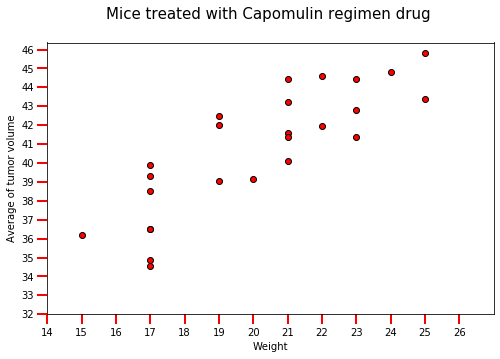

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#make group by for mouse id just treated by Capomulin and take the average 
mouseid_tumor = mouse_treated_with_Capomulin.groupby(["Mouse ID"]).mean()

plt.figure(figsize=(8,5))

#generate a chart by calling x and y 
plt.scatter(mouseid_tumor["Weight (g)"],mouseid_tumor["Tumor Volume (mm3)"],marker="o", facecolors="red",edgecolors="k")

plt.xlabel("Weight",fontsize=10)
plt.ylabel("Average of tumor volume",fontsize=10)
plt.title("Mice treated with Capomulin regimen drug \n",loc="center",fontsize=15)
plt.tick_params(labelsize=10, width=2, length=10,color="r")

#put x axis limit by the right side 
plt.xlim(right=max(mouseid_tumor["Weight (g)"]+2))

#put y axis limit from the bottom 
plt.ylim(bottom=33)

#put arange ticks 
plt.yticks(np.arange(32,47,1))
plt.xticks(np.arange(14,27,1))
# mouseid_tumor
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


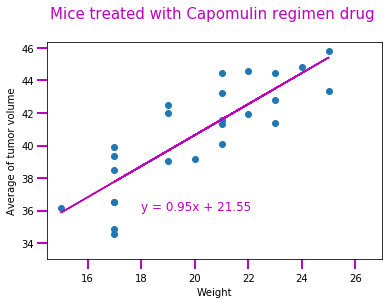

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#find x axis 
mice_weight = mouseid_tumor["Weight (g)"]

#find y axis 
avg_tumor_volume=mouseid_tumor["Tumor Volume (mm3)"]

#calculate the correlation for x and y
correlation=st.pearsonr(mice_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(mice_weight, avg_tumor_volume)

#find the regress value by using x axis value  
regress_values = mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mice_weight,avg_tumor_volume)

#generate the linear regression
plt.plot(mice_weight,regress_values,"m-")

#create x and y values to put equation on it 
plt.annotate(line_eq,(18,36),fontsize=12,color="m")

plt.xlabel("Weight",fontsize=10)
plt.ylabel("Average of tumor volume",fontsize=10)
plt.xlim(right=max(mouseid_tumor["Weight (g)"]+2))
plt.ylim(bottom=33)
plt.tick_params(labelsize=10, width=2, length=10,color="m")
plt.title("Mice treated with Capomulin regimen drug \n",loc="center",fontsize=15,color="m")

plt.show()
regress_values